In [39]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

import math

In [2]:
#generate random data
data_dimension = 2
no_of_points = 100

# Use a reed to reproduce randomized numbers
np.random.seed(0)
data_set_random = np.random.random((no_of_points, data_dimension))

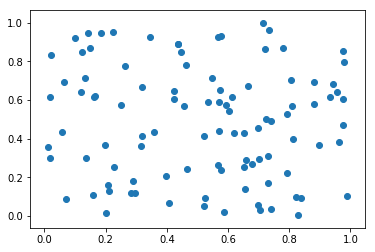

In [3]:
X = data_set_random
plt.scatter(X[:, 0], X[:, 1])

In [4]:
n_samples = 100
random_state = 17

In [5]:
y_pred = KMeans(n_clusters=5, random_state=random_state).fit_predict(X)

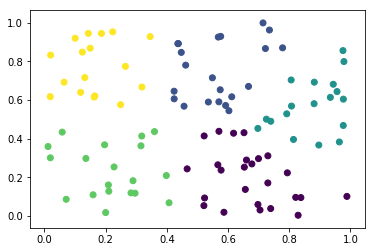

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

In [7]:
X_blob, y_blob = make_blobs(n_samples=n_samples, random_state=random_state, center_box=(0,1),cluster_std = 0.05,centers=4)

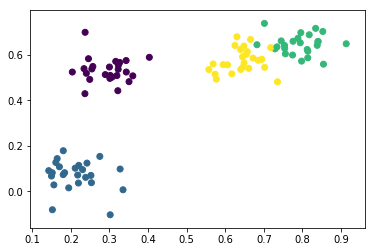

In [9]:
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob)

In [11]:
X_con=np.concatenate((X,X_blob),axis = 0)

In [12]:
y_pred = KMeans(n_clusters=4, random_state=random_state).fit_predict(X_con)

(-0.2, 1.2)

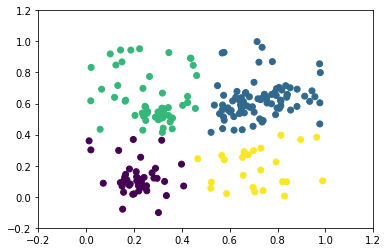

In [37]:
plt.scatter(X_con[:, 0], X_con[:, 1], c=y_pred)
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)

In [62]:
k_value = 3
np.random.seed(1)
cluster_points = np.random.random((k_value, data_dimension))

In [63]:

cluster_points

array([[4.17022005e-01, 7.20324493e-01],
       [1.14374817e-04, 3.02332573e-01],
       [1.46755891e-01, 9.23385948e-02]])

(0, 1)

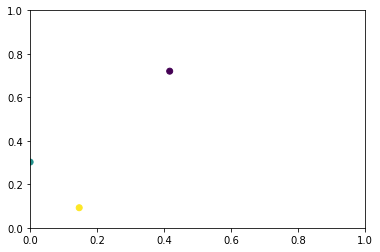

In [65]:
plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=range(0,k_value))
plt.xlim(0, 1)
plt.ylim(0, 1)

In [68]:
def distance(a, b):
    dist = np.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)

    return(dist)
    

In [71]:
print(distance(cluster_points[0],X[0]))

0.13189150388834694


In [73]:
print(distance(X[0],cluster_points[0]))

0.13189150388834694


In [96]:
def min_dist_pos(X ,cluster_points):
    smallest = []
    position = []
    for x in X:
        distances = []
        for i in range(0,k_value):
            distances.append(distance(x,cluster_points[i]))
        mn = np.min(distances)
        pos = np.argmin(distances)
        smallest.append(mn)
        position.append(pos)
    return np.array(smallest), np.array(position)

In [105]:
np.mean([1,2])

1.5

In [97]:
small, pos =  min_dist_pos(X ,cluster_points)

In [108]:
np.mean(small)

0.34269526508595244

In [137]:
coord = 2
[np.mean(X[pos==coord,0]),np.mean(X[pos==coord,1])]

[0.4929882155260576, 0.12898349749768195]

In [118]:
pos==0

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True, False,  True, False, False,  True, False,
       False,  True, False, False, False, False, False, False,  True,
        True, False, False, False,  True,  True, False, False,  True,
        True,  True, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True, False, False, False, False,  True,  True, False,
        True, False,  True,  True,  True, False,  True,  True, False,
       False])